In [47]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.cosmology as cosmo
import astropy.units as u
from scipy.stats import norm
from scipy import stats

(array([], dtype=int64),)


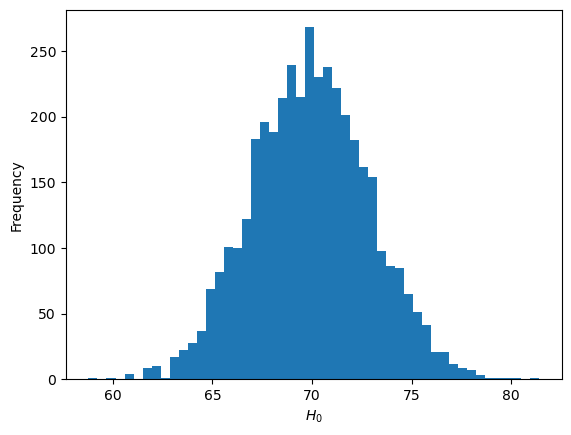

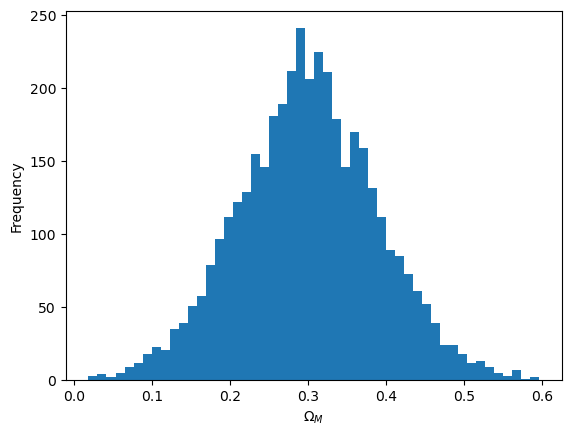

In [80]:
np.random.seed(0)
Nsamp = 4000

a = 70
b = 3
H0 = np.random.normal(a,b,Nsamp)

c = 0.3
d = 0.09
Om = np.random.normal(c,d,Nsamp)
print(np.where(Om<0))

_ = plt.hist(H0, bins=50)
plt.xlabel(r'$H_0$');
plt.ylabel('Frequency');
plt.figure()
_ = plt.hist(Om, bins=50)
plt.xlabel(r'$\Omega_M$');
plt.ylabel('Frequency');

In [81]:
DL = np.zeros((Nsamp,100))
z = np.linspace(0.1,10,100)
for i in range(Nsamp):
    DL[i] = cosmo.FlatLambdaCDM(H0=H0[i],Om0=Om[i]).luminosity_distance(z).to(u.Gpc).value

In [82]:
DL.shape

(4000, 100)

In [83]:
skew = stats.skew(DL, axis=0)
kurtosis = stats.kurtosis(DL, axis=0)
print(skew.shape, kurtosis.shape)

(100,) (100,)


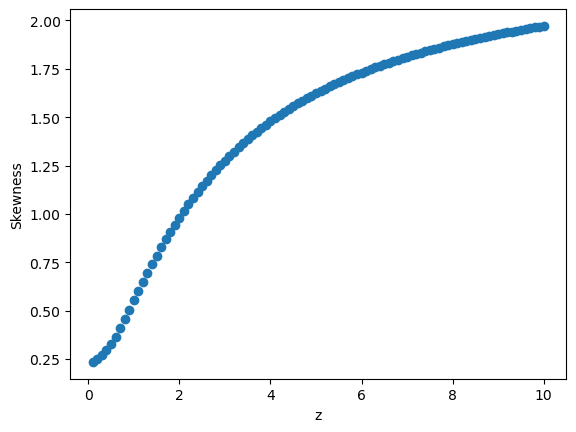

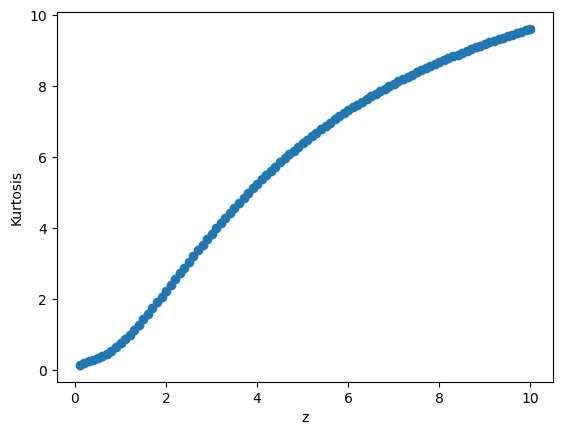

In [84]:
plt.scatter(z, skew);
plt.xlabel('z');
plt.ylabel('Skewness');
plt.figure()
plt.scatter(z, kurtosis);
plt.xlabel('z');
plt.ylabel('Kurtosis');

Normal approximation is getting worse with redshift as higher order moments are increasing.

In [86]:
DL.T[-1].shape

(4000,)

Redshift 10:

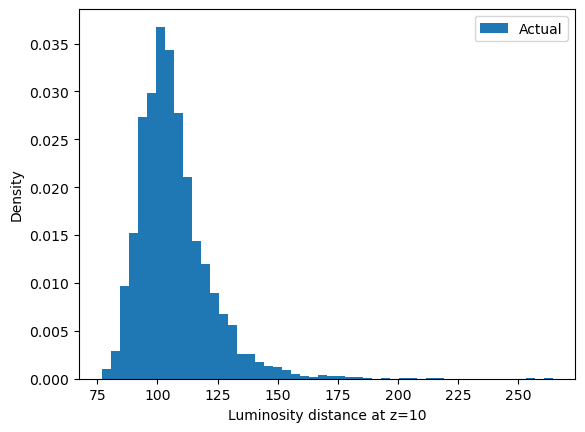

In [87]:
_ = plt.hist(DL.T[-1], bins=50, density=True, label='Actual')
plt.xlabel('Luminosity distance at z=10');
plt.ylabel('Density');
plt.legend();

At Redshift=6:

In [88]:
DL.T[np.where(z==6)][0]

array([50.65320853, 48.69111323, 53.94783267, ..., 59.04258352,
       55.56297123, 59.3865214 ])

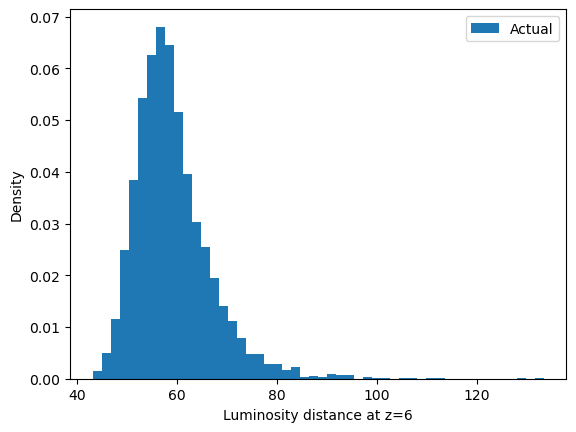

In [89]:
_ = plt.hist(DL.T[np.where(z==6)][0], bins=50, density=True, label='Actual')
plt.xlabel('Luminosity distance at z=6');
plt.ylabel('Density');
plt.legend();